In [3]:
!git clone https://github.com/yzdxdydz/strip-packing.git

Cloning into 'strip-packing'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 79 (delta 25), reused 43 (delta 7), pack-reused 0
Receiving objects: 100% (79/79), 287.32 KiB | 3.59 MiB/s, done.
Resolving deltas: 100% (25/25), done.


In [4]:
cd strip-packing

/content/strip-packing


In [5]:
pip install -r requirements.txt

In [8]:
from time import time
from random import randint

from src.steinberg_packing import SteinbergPacking


def random_example_with_optimum():
    from random import randint
    strip_width = randint(10, 100)
    strip_height = randint(10, 100)
    count = randint(3, 100)
    elements = [[strip_width, strip_height]]
    steps = 0
    while len(elements) < count and steps < 1000:
        steps += 1
        current_count = len(elements)
        cut_index = randint(0, current_count - 1)
        vertical_cut = randint(0, 1)
        if vertical_cut == 0 and elements[cut_index][0] > 1:
            cut_size = randint(1, elements[cut_index][0] - 1)
            remained_size = elements[cut_index][0] - cut_size
            elements[cut_index][0] = cut_size
            elements.append([remained_size, elements[cut_index][1]])
        elif vertical_cut == 1 and elements[cut_index][1] > 1:
            cut_size = randint(1, elements[cut_index][1] - 1)
            remained_size = elements[cut_index][1] - cut_size
            elements[cut_index][1] = cut_size
            elements.append([elements[cut_index][0], remained_size])
    return strip_width, strip_height, elements


def random_example():
    from random import randint
    strip_width = randint(3, 100)
    elements = []
    count = randint(3, 100)
    for i in range(count):
        elements.append([randint(1, strip_width), randint(1, 100)])
    return strip_width, elements


def run_without_optimum(count_of_examples=10000, eps=1e-3):
    time_0 = 0
    time_1 = 0
    time_2 = 0
    card_k_1 = 0
    delta_0_1 = 0
    card_k_2 = 0
    delta_0_2 = 0
    for _ in range(count_of_examples):
        width, elements = random_example()
        start = time()
        sp = SteinbergPacking(width, False, False)
        sp.get_packing(elements)
        end = time()
        time_0 += (end-start)/len(elements)
        height_estimate = sp.height
        height_0 = sp.max_height()
        start = time()
        sp = SteinbergPacking(width, True, False)
        sp.get_packing(elements)
        end = time()
        time_1 += (end-start)/len(elements)
        height_1 = sp.max_height()
        start = time()
        sp = SteinbergPacking(width, True, True)
        sp.get_packing(elements)
        end = time()
        time_2 += (end-start)/len(elements)
        height_2 = sp.max_height()
        if height_estimate + eps < height_0 or \
                height_0 + eps < height_1 or \
                height_1 + eps < height_2:
            print("Incorrect results: ",
                  height_estimate, height_0, height_1, height_2)
        if height_0 > eps + height_1:
            delta_0_1 += height_0/height_1
            card_k_1 += 1
        if height_0 > eps + height_2:
            delta_0_2 += height_0/height_2
            card_k_2 += 1
    print("Average time: original={0:.3e}, "
          "no gaps={1:.3e}, "
          "dropped={2:.3e}".format(time_0/count_of_examples,
                                   time_1/count_of_examples,
                                   time_2/count_of_examples)
          )
    print("Omega: no gaps={0:.3f}, "
          "dropped={1:.3f}".format(card_k_1/count_of_examples,
                                   card_k_2/count_of_examples)
          )
    print("Delta: no gaps={0:.3f}, "
          "dropped={1:.3f}".format(delta_0_1/card_k_1,
                                   delta_0_2/card_k_2)
          )


def run_with_optimum(count_of_examples=10000, eps=1e-3):
    alpha_0_0_0 = 0
    alpha_0_0_1 = 0
    alpha_0_0_2 = 0
    time_0 = 0
    time_1 = 0
    time_2 = 0
    card_k_1 = 0
    delta_0_1 = 0
    card_k_2 = 0
    delta_0_2 = 0
    for _ in range(count_of_examples):
        width, optimum_height, elements = random_example_with_optimum()
        start = time()
        sp = SteinbergPacking(width, False, False)
        sp.get_packing(elements)
        end = time()
        time_0 += (end-start)/len(elements)
        height_estimate = sp.height
        height_0 = sp.max_height()
        start = time()
        sp = SteinbergPacking(width, True, False)
        sp.get_packing(elements)
        end = time()
        time_1 += (end-start)/len(elements)
        height_1 = sp.max_height()
        start = time()
        sp = SteinbergPacking(width, True, True)
        sp.get_packing(elements)
        end = time()
        time_2 += (end-start)/len(elements)
        height_2 = sp.max_height()
        if height_estimate + eps < height_0 or \
                height_0 + eps < height_1 or \
                height_1 + eps < height_2:
            print("Incorrect results: ",
                  height_estimate, height_0, height_1, height_2)
        if height_0 > eps + height_1:
            delta_0_1 += height_0/height_1
            card_k_1 += 1
        if height_0 > eps + height_2:
            delta_0_2 += height_0/height_2
            card_k_2 += 1
        alpha_0_0_0 += height_0/optimum_height
        alpha_0_0_1 += height_1/optimum_height
        alpha_0_0_2 += height_2/optimum_height
    print("Average time: original={0:.3e}, "
          "no gaps={1:.3e}, "
          "dropped={2:.3e}".format(time_0/count_of_examples,
                                   time_1/count_of_examples,
                                   time_2/count_of_examples)
          )
    print("Omega: no gaps={0:.3f}, "
          "dropped={1:.3f}".format(card_k_1/count_of_examples,
                                   card_k_2/count_of_examples)
          )
    print("Delta: no gaps={0:.3f}, "
          "dropped={1:.3f}".format(delta_0_1/card_k_1,
                                   delta_0_2/card_k_2)
          )
    print("Alpha0: original={0:.3f}, "
          "no gaps={1:.3f}, "
          "dropped={2:.3f}".format(alpha_0_0_0/count_of_examples,
                                   alpha_0_0_1/count_of_examples,
                                   alpha_0_0_2/count_of_examples)
          )

def run_example(width, elements, example_name):
    colors = []
    for _ in elements:
        colors.append('#%06X' % randint(0, 0xFFFFFF))
    sp = SteinbergPacking(width, False, False)
    sp.get_packing(elements)
    sp.plot_packing(colors, "original-" + example_name + ".png")
    sp = SteinbergPacking(width, True, False)
    sp.get_packing(elements)
    sp.plot_packing(colors, "no-gaps-" + example_name + ".png")
    sp = SteinbergPacking(width, True, True)
    sp.get_packing(elements)
    sp.plot_packing(colors, "dropped-" + example_name + ".png")



In [9]:
run_with_optimum()

Average time: original=1.207e-05, no gaps=1.620e-04, dropped=2.723e-04
Omega: no gaps=0.562, dropped=0.818
Delta: no gaps=1.051, dropped=1.177
Alpha0: original=1.920, no gaps=1.872, dropped=1.691


In [10]:
run_without_optimum()

Average time: original=8.105e-06, no gaps=1.701e-04, dropped=2.997e-04
Omega: no gaps=0.388, dropped=0.459
Delta: no gaps=1.167, dropped=1.204


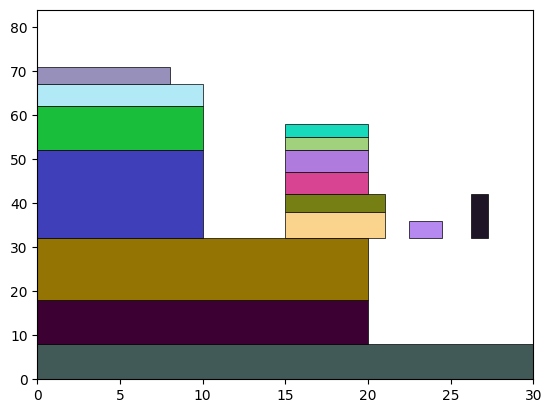

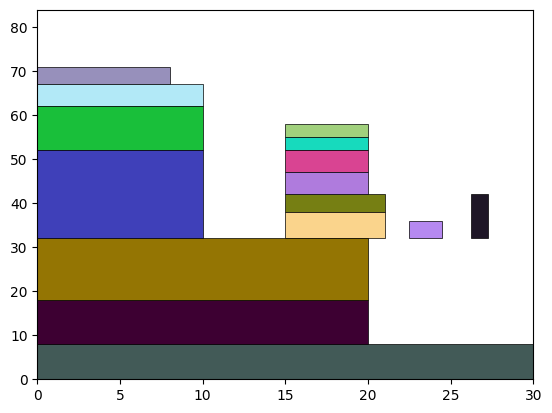

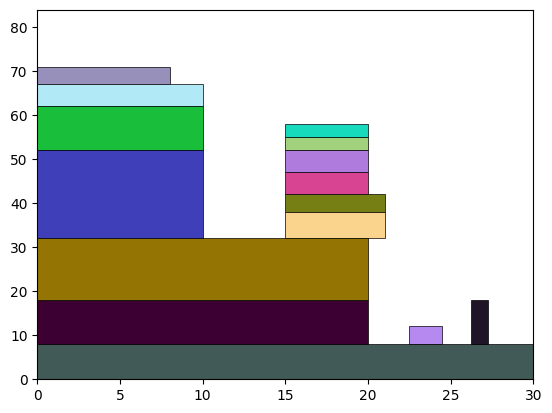

In [11]:
run_example(30, [[5, 3], [5, 3], [2, 4], [30, 8],
    			       [10, 20], [20, 10], [5, 5], [5, 5],
    			       [10, 10], [10, 5], [6, 4], [1, 10],
                 [8, 4], [6, 6], [20, 14]
                ],
            "1"
            )

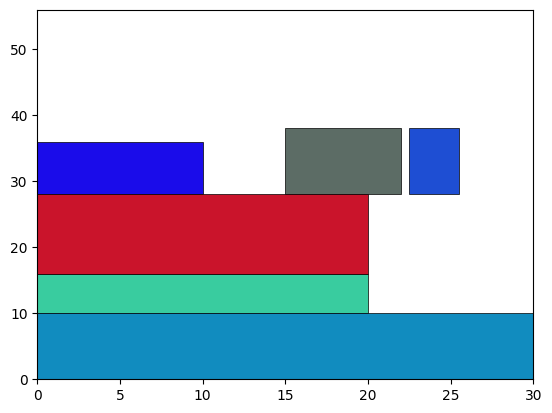

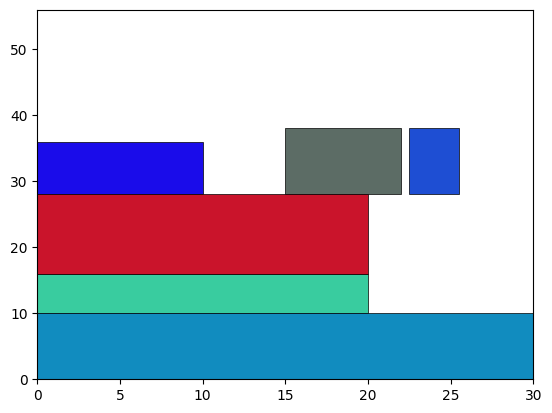

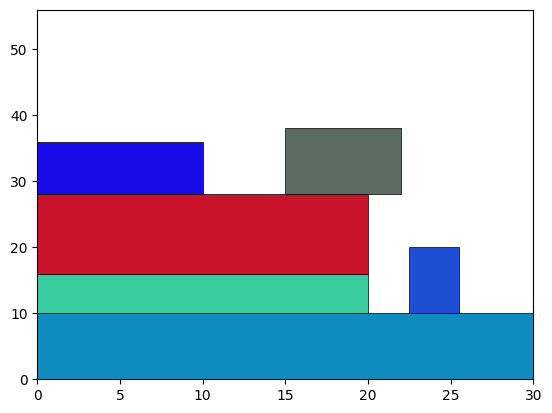

In [12]:
run_example(30, [[20, 6], [3, 10], [7, 10],
    			       [20, 12], [10, 8], [30, 10]
                ],
            "2")

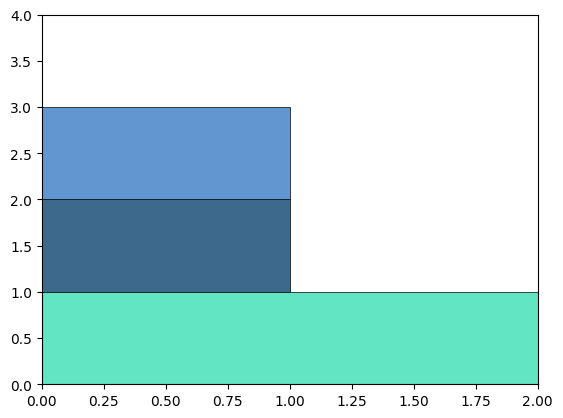

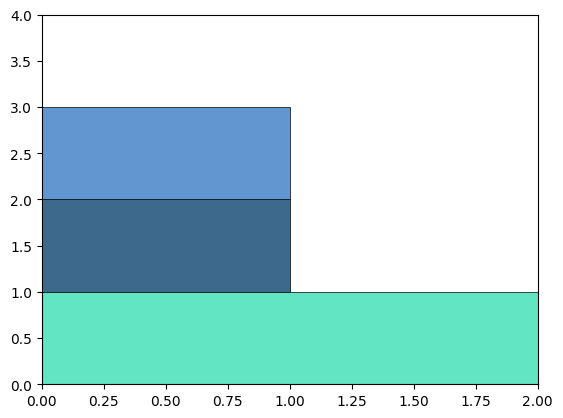

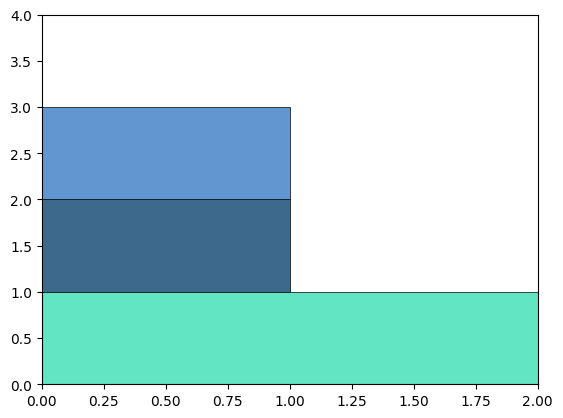

In [13]:
run_example(2, [[1, 1], [1, 1], [2, 1]], "3")

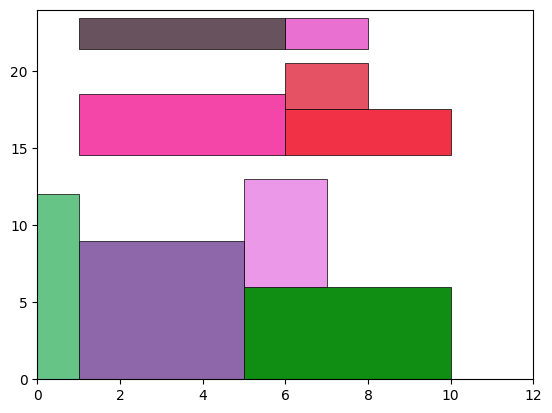

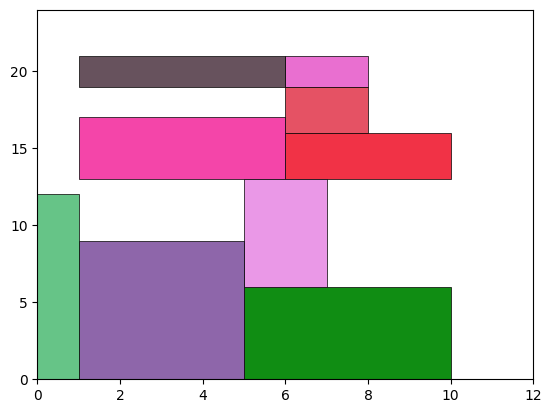

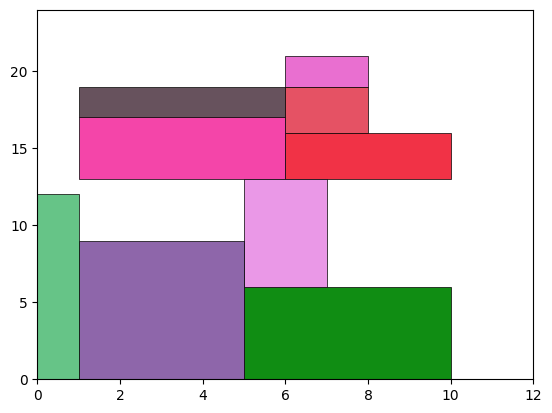

In [14]:
run_example(12, [[4, 3], [4, 9], [1, 12], [2, 3],
    			       [2, 7], [2, 2], [5, 2], [5, 6], [5, 4]
                ],
            "4")

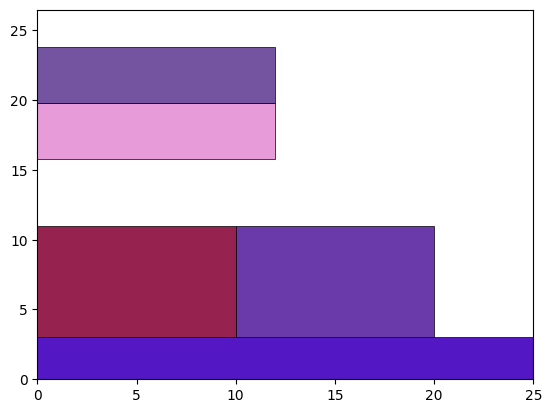

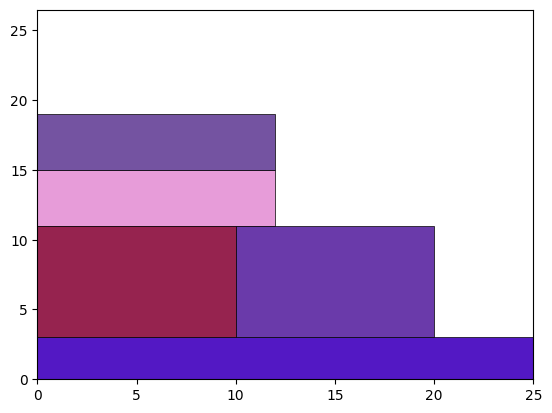

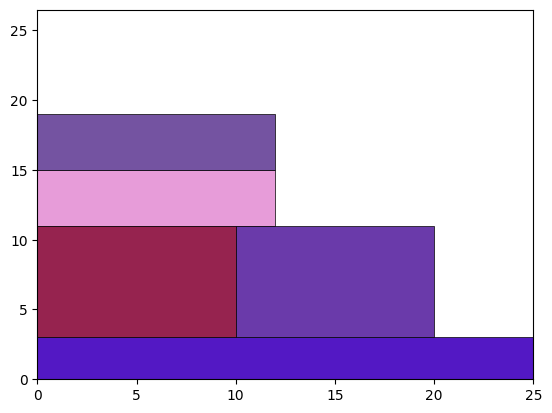

In [19]:
run_example(25, [[10, 8], [10, 8], [12, 4], [12, 4], [25, 3]], "5")

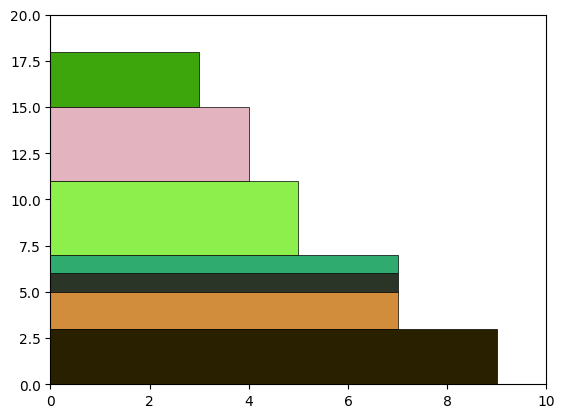

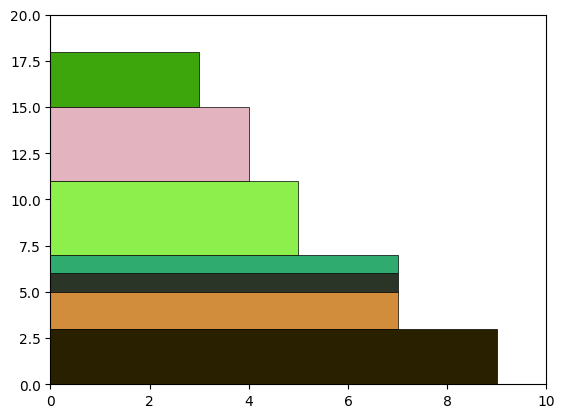

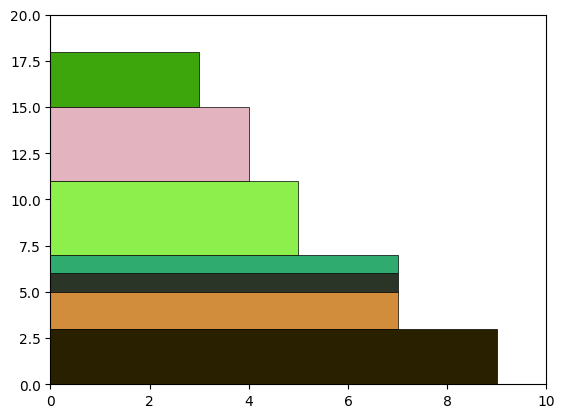

In [20]:
run_example(10, [[3, 3], [7, 2], [7, 1], [9, 3],
    			       [5, 4], [4, 4], [7, 1]
                ],
            "6")

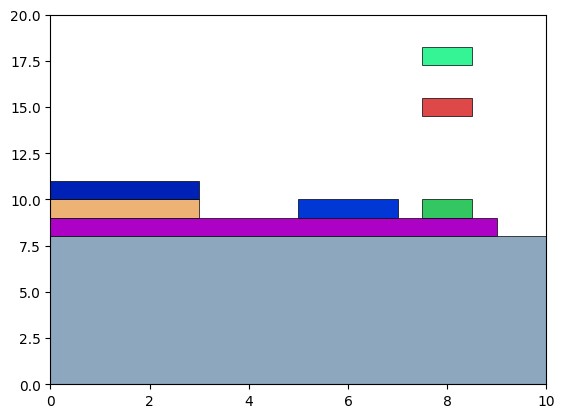

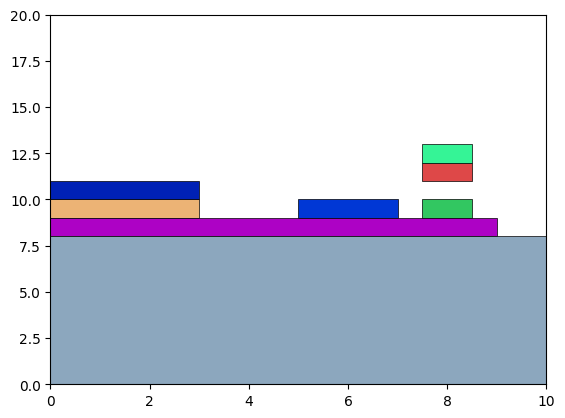

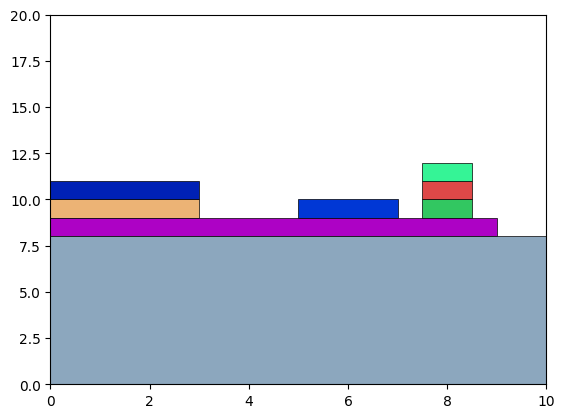

In [21]:
run_example(10, [[1, 1], [1, 1], [10, 8], [3, 1],
    			       [9, 1], [2, 1], [1, 1], [3, 1]
                ],
            "7")